**Case Study for Customer Segmentation**

**The Context**
In today's competitive world, it is crucial to understand **customer behaviours** and categorise customers based **on their demography and buying behaviour**. This is a critical aspect of customer segmentation that allows marketeres to better tailor their marketing efforts to various audience subsets in terms of promotional, marketing and product development strategies.

**The Goal***
This article demonstrates the concept of segmentation of a customer from a e-commerce site using k-means clustering in python.
The dataset contains the **annual income** of ~300K customers and their **annual spend** on an e-commerce site.
We will use K-Means to derive the optimum number of clusters and understand the underlying customer segments based on the data provided.

**Data Description**
The dataset consists of annual income (in $000) of 303 customers and their total spend on an e-commerce site for a period of one year.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score

In [6]:
data = pd.read_csv('./data/CLV.csv')
data.head()

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163


## **Data Analysis**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   INCOME  303 non-null    int64
 1   SPEND   303 non-null    int64
dtypes: int64(2)
memory usage: 4.9 KB


In [8]:
data.shape

(303, 2)

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
INCOME,303.0,245.273927,48.499412,126.0,211.0,240.0,274.0,417.0
SPEND,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0


In [10]:
data.isnull().any()

INCOME    False
SPEND     False
dtype: bool

## **Variable Distribution and Outlier Verification**

INCOME
Skew: 0.5201348841768221


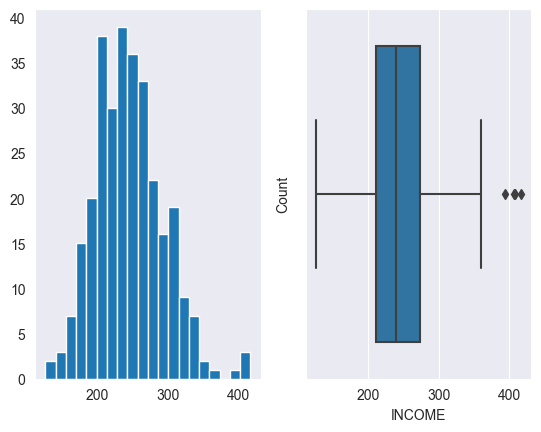

SPEND
Skew: -0.5374096526832253


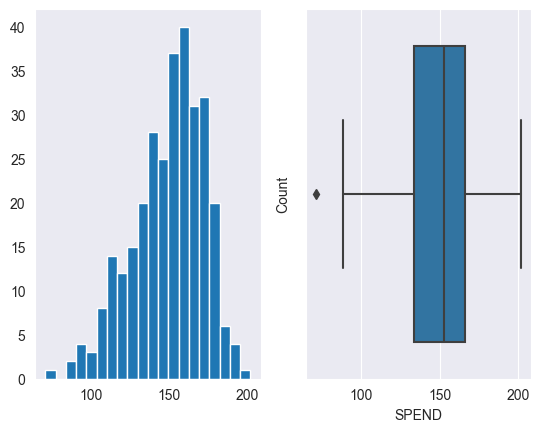

In [13]:
for col in data.columns:
    print(col)
    print('Skew:', data[col].skew())
    plt.subplot(1, 2, 1)
    data[col].hist(bins=20, grid=False)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.ylabel('Count')
    plt.show()

<Axes: >

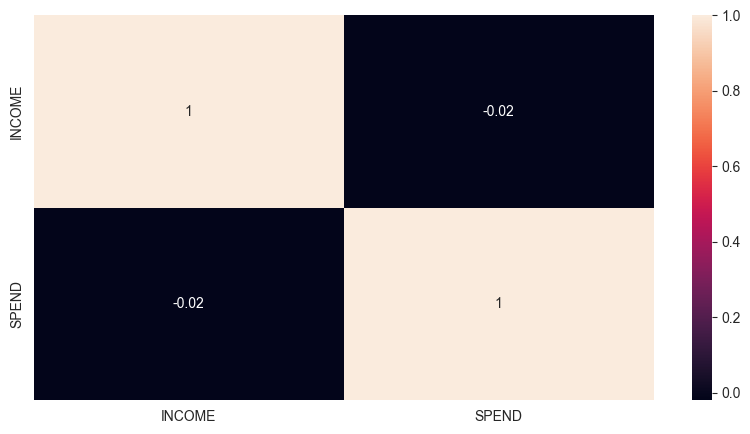

In [14]:
#checking for correlation
plt.figure(figsize=(10, 5))
sns.heatmap(data=data.corr(), annot=True)

Standardization
Scaling the data

In [15]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data_scaled_copy = data_scaled.copy()
data_scaled.head()

,INCOME,SPEND
0,-0.253492,0.015443
1,0.097607,1.633471
2,-0.852427,0.977514
3,-0.191534,1.239897
4,2.245510,0.583939


C:\Users\lorac\PycharmProjects\Case Studies\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lorac\PycharmProjects\Case Studies\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lorac\PycharmProjects\Case Studies\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lorac\PycharmProjects\Case Studies\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

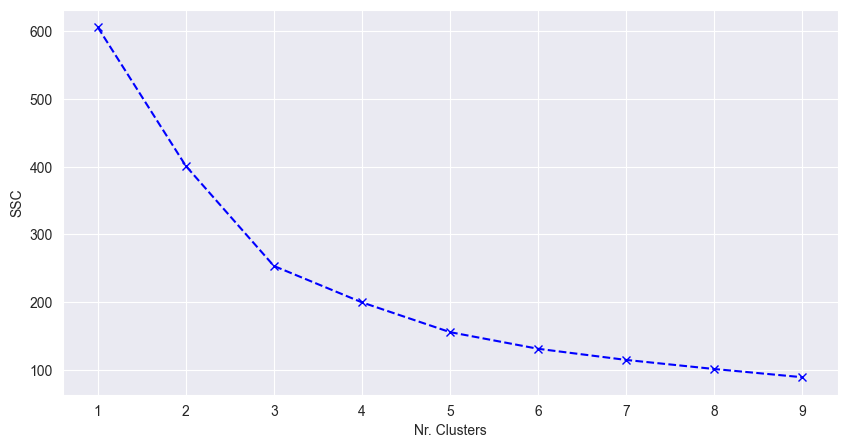

In [17]:
#Kmeans

ssc={}

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data_scaled)
    ssc[k] = kmeans.inertia_


#Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(list(ssc.keys()), list(ssc.values()), 'bx--')
plt.xlabel('Nr. Clusters')
plt.ylabel('SSC')
plt.show()

C:\Users\lorac\PycharmProjects\Case Studies\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lorac\PycharmProjects\Case Studies\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lorac\PycharmProjects\Case Studies\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lorac\PycharmProjects\Case Studies\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

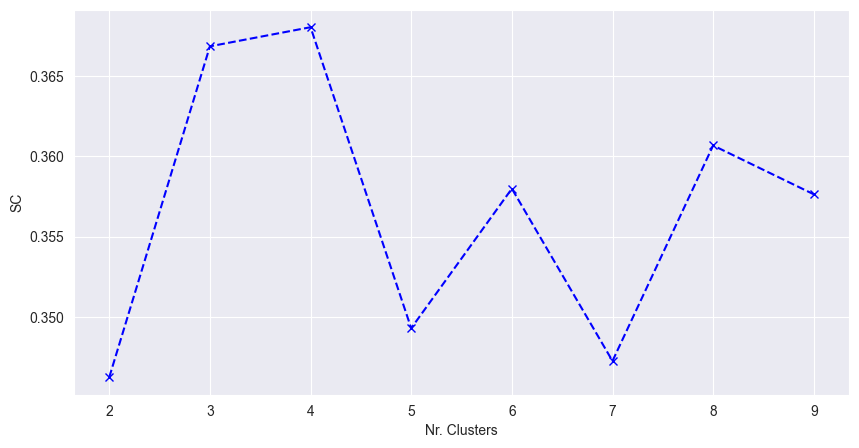

In [19]:
# silhouette score
sc = {}

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data_scaled)
    labels = kmeans.labels_
    sc[k] = silhouette_score(data_scaled, labels)

plt.figure(figsize=(10,5))
plt.plot(list(sc.keys()), list(sc.values()), 'bx--')
plt.xlabel('Nr. Clusters')
plt.ylabel('SC')
plt.show()

In [20]:
kmeans = KMeans(n_clusters=4, random_state=1).fit(data_scaled)
data['Labels'] = kmeans.predict(data_scaled)
data_scaled_copy['Labels'] = kmeans.predict(data_scaled)

data['Labels'].value_counts()

C:\Users\lorac\PycharmProjects\Case Studies\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1    129
2     61
3     60
0     53
Name: Labels, dtype: int64

In [27]:
mean = data.groupby('Labels').mean()
median = data.groupby('Labels').median()

dfkmeans = pd.concat([mean, median], axis=0)
dfkmeans.index = ['G0_Mean', 'G1_Mean', 'G2_Mean', 'G3_Mean', 'G0_Median', 'G1_Median', 'G2_Median', 'G3_Median']
dfkmeans.T


,G0_Mean,G1_Mean,G2_Mean,G3_Mean,G0_Median,G1_Median,G2_Median,G3_Median
INCOME,196.509434,223.162791,310.770492,269.300000,201.0,228.0,304.0,265.0
SPEND,127.792453,166.310078,158.295082,124.333333,130.0,165.0,159.0,125.0


**Cluster 1**: Customers with Medium Income and Low Spend
**Cluster 2**: Customers with Medium Income and Higher Spend
**Cluster 3**: Customers with Higher Income and Medium Spend
**Cluster 4**: Customers with Medium Income and Lower Spend



INCOME


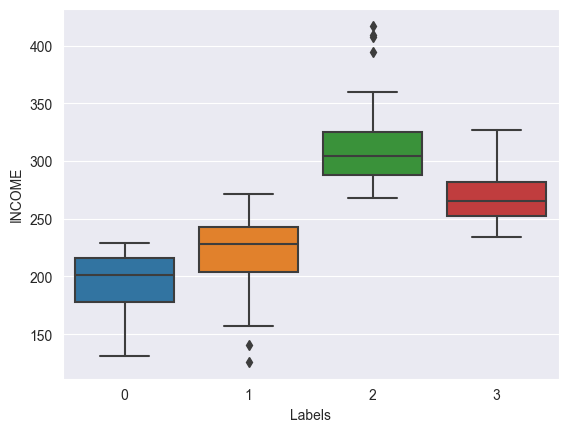

SPEND


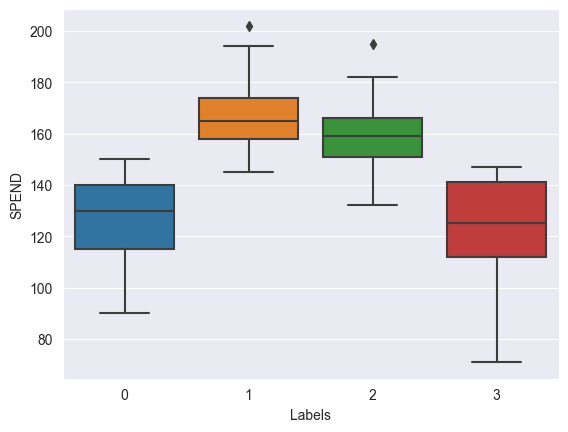

Labels


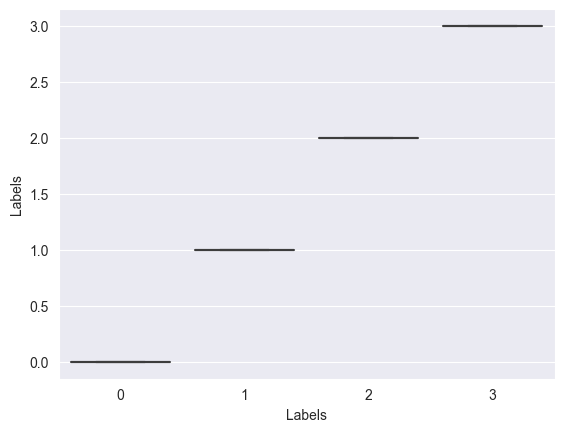

In [28]:
for col in data.columns:
    print(col)
    sns.boxplot(x=data['Labels'], data=data, y=col)
    plt.show()

https://towardsdatascience.com/clustering-algorithms-for-customer-segmentation-af637c6830ac